IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Transaction
df_transaction = pd.read_excel(r"C:\Users\ssree\Downloads\QVI_transaction_data.xlsx")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Customer
df_customer = pd.read_csv(r"C:\Users\ssree\Downloads\QVI_purchase_behaviour.csv")
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


MERGE DATASETS

In [6]:
df = pd.merge(df_transaction, df_customer, on="LYLTY_CARD_NBR", how="left")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


EXPLORATORY DATA ANALYSIS

In [8]:
# Rename columns to became meaningful
df = df.rename(columns={"LYLTY_CARD_NBR" : "Card No.",
                        "LIFESTAGE" : "Group",
                        "DATE" : "Date",
                        "PREMIUM_CUSTOMER" : "Subscription",
                        "STORE_NBR" : "Store Id",
                        "TXN_ID" : "Transaction Id",
                        "PROD_NBR" : "Product Id",
                        "PROD_NAME" : "Product",
                        "PROD_QTY" : "Quantity",
                        "TOT_SALES" : "Sales",
                        })
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [9]:
df.dtypes

Date                int64
Store Id            int64
Card No.            int64
Transaction Id      int64
Product Id          int64
Product            object
Quantity            int64
Sales             float64
Group              object
Subscription       object
dtype: object

CONVERT DATA DATATYPE FROM (int to Date)

In [11]:
# 15 Dates
date_offsets = df["Date"].to_list()
base_date = pd.Timestamp("1899-12-30") # Start Date
df["Date"] = [base_date + pd.DateOffset(date_offset) for date_offset in date_offsets]
df["Date"][0:15]

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
5    2019-05-19
6    2019-05-16
7    2019-05-16
8    2018-08-20
9    2018-08-18
10   2019-05-17
11   2018-08-20
12   2019-05-18
13   2018-08-17
14   2019-05-15
Name: Date, dtype: datetime64[ns]

In [12]:
# Remove numbers & special characters
split_prods = df["Product"].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^\w]", " ").str.split()
split_prods

0                    [Natural, Chip, Compny, SeaSalt175g]
1                              [CCs, Nacho, Cheese, 175g]
2            [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
3             [Smiths, Chip, Thinly, S/Cream&Onion, 175g]
4          [Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]
                               ...                       
264831    [Kettle, Sweet, Chilli, And, Sour, Cream, 175g]
264832                 [Tostitos, Splash, Of, Lime, 175g]
264833                          [Doritos, Mexicana, 170g]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno, 150g]
264835                 [Tostitos, Splash, Of, Lime, 175g]
Name: Product, Length: 264836, dtype: object

REMOVE SALSA PRODUCTS

In [14]:
df = df[~df["Product"].str.contains(r"[Ss]alsa")]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


CHECK NULL & OUTLIERS

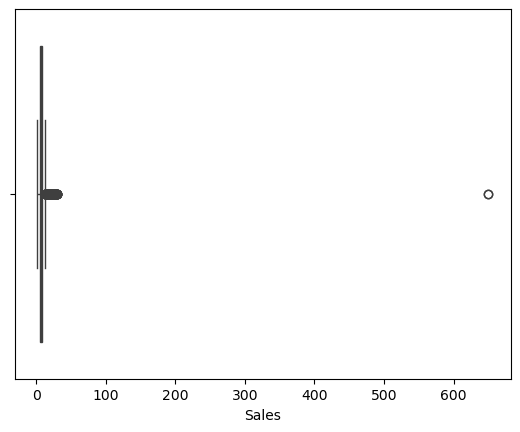

In [16]:
plt.Figure(figsize=(9,8))
sns.boxplot(data=df,x="Sales")
plt.show()

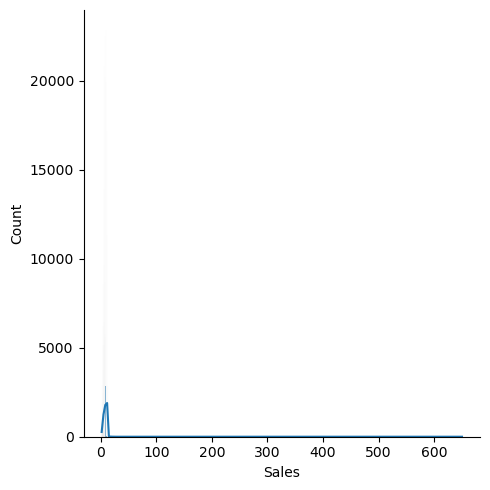

In [17]:
plt.Figure(figsize=(9,8))
sns.displot(data=df,x="Sales",kde=True) 
plt.show()

In [18]:
df["Sales"].mean()

7.321322271846707

In [19]:
numericaldata=df.select_dtypes(['float','int'])

In [20]:
numericaldata.head()


,Store Id,Card No.,Transaction Id,Product Id,Quantity,Sales
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
3,2,2373,974,69,5,15.0
4,2,2426,1038,108,3,13.8


<H1 style=color:cyan;>REMOVING OUTLIERS</H1>

In [22]:
x=numericaldata[numericaldata['Sales']<8.00]

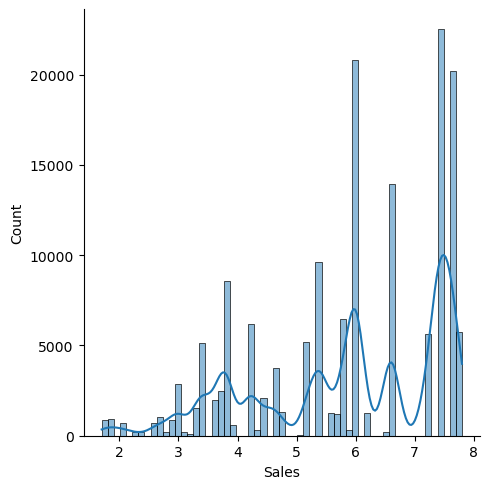

In [23]:
plt.Figure(figsize=(9,8))
sns.displot(data=x,x="Sales",kde=True)
plt.show()

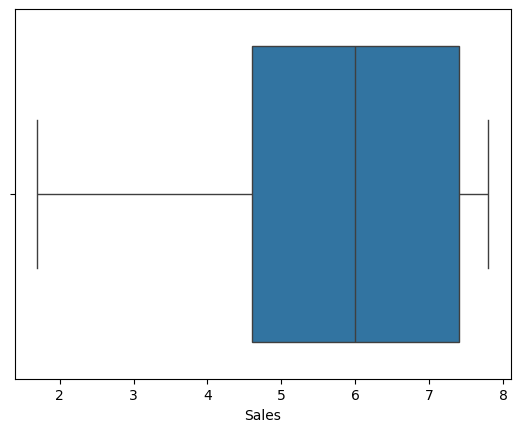

In [24]:
plt.Figure(figsize=(9,8))
sns.boxplot(data=x,x="Sales")
plt.show()

VIEW OUTLIER CUSTOMER

In [26]:
df.sort_values(by = "Quantity", ascending = False).head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,RETIREES,Budget
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,OLDER FAMILIES,Premium
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,OLDER FAMILIES,Premium


SEE IF Card No. 226000 HAS OTHER TRANSACTIONS

In [28]:
len(df[df["Card No."] == 226000])

2

IT LOOKS LIKE THIS CUSTOMER HAS ONLY HAD THE TWO TRANSACTIONS OVER THE YEAR AND IS NOT AN ORDINARY RETAIL CUSTOMER. THE CUSTOMER MIGHT BE BUYING CHIPS FOR COMMERCIAL PURPOSES INSTEAD. WE WILL REMOVE THIS LOYALTY CARD NUMBER FROM FURTHER ANALYSIS.

In [30]:
df = df[df["Quantity"] < 6]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


COUNT THE NUMBER OF TRANSACTIONS BY DATE

In [32]:
trans_by_date = df["Date"].value_counts()
trans_by_date

Date
2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: count, Length: 364, dtype: int64

INSTEAD OF 365, THE DATE COLUMN ONLY HAS 364 UNIQUE VALUES. 1 IS MISSING.

In [34]:
pd.date_range(start=df["Date"].min(), end=df["Date"].max()).difference(df["Date"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [35]:
merge_value = pd.merge(pd.Series(pd.date_range(start=df["Date"].min(), end=df["Date"].max()), name="Date"), df, on="Date", how="left")
merge_value.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget


<h4>ALL TIME SALES GRAPH</h4>

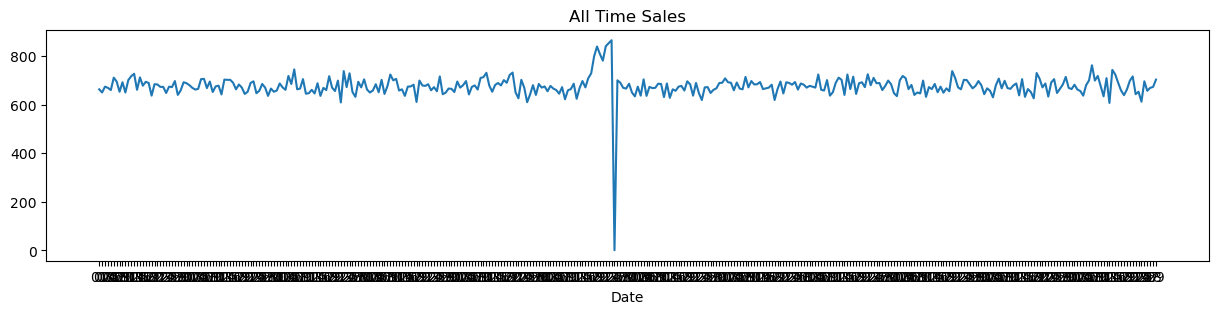

In [37]:
trans_by_date = merge_value["Date"].value_counts()
all_time = trans_by_date[(trans_by_date.index >= pd.Timestamp(2018,7,1)) & (trans_by_date.index < pd.Timestamp(2019,6,30))].sort_index()
all_time.index = all_time.index.strftime('%d')
ax = all_time.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(all_time)))
ax.set_xticklabels(all_time.index)
plt.title("All Time Sales")
plt.savefig("All Time Sales.png", bbox_inches="tight")
plt.show()

DECEMBER SALES GRAPH

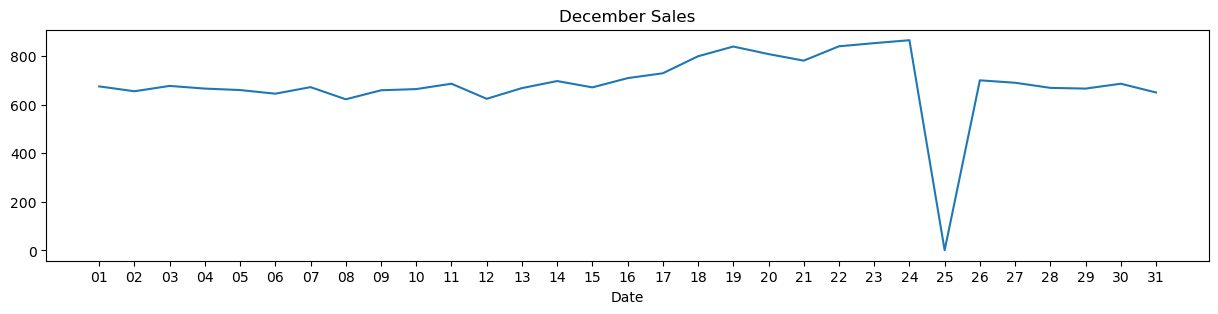

In [39]:
trans_by_date = merge_value["Date"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.Timestamp(2018,12,1)) & (trans_by_date.index < pd.Timestamp(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("December Sales")
plt.savefig("December Sales.png", bbox_inches="tight")
plt.show()

EXPLORE PRODUCT PACK SIZE

In [67]:
df["Product"] = df["Product"].str.replace(r"(\d+)\s*[gG]", r"\1g", regex=True)
# Extract the numeric part before "g" or "G" and convert to float
pack_size = df["Product"].str.extract(r"(\d+)[gG]")[0].astype(float)
print(pack_size)

0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: 0, Length: 246740, dtype: float64


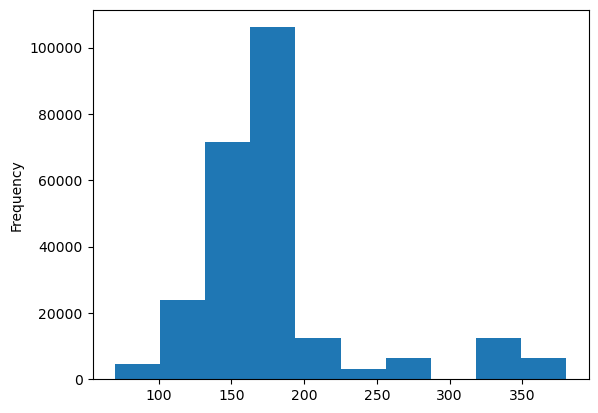

In [69]:
pack_size.plot.hist()
plt.show()

In [71]:
df["Product"].str.split().str[0].value_counts()

Product
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

INCLUDE BRAND NAME COLUMN

In [77]:
df["Brand"] = df["Product"].str.split().str[0]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


In [79]:
def clear_brand_names(line) :
    brand = line["Brand"]
    if brand == "Dorito" :
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain" :
        return "Grain Waves"
    elif brand == "Infzns" :
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC" :
        return "Natural Chip Co"
    elif brand == "Red" :
        return "RRD"
    elif brand == "Smith" :
        return "Smiths"
    elif brand == "Snbts" :
        return "Sunbites"
    elif brand == "WW" :
        return "Woolworths"
    else :
        return brand

In [81]:
df["Brand"] = df.apply(lambda line : clear_brand_names(line), axis=1)
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


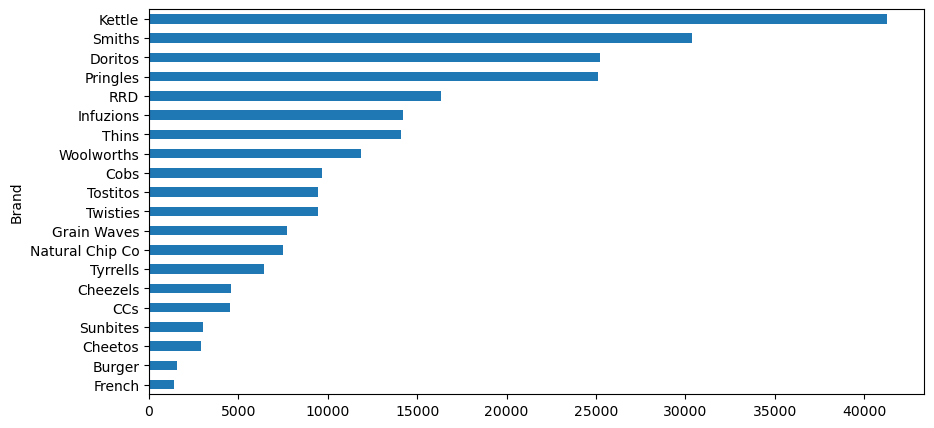

In [83]:
df["Brand"].value_counts(ascending=True).plot.barh(figsize = (10, 5))
plt.show()

 2/ HOW MANY CUSTOMERS ARE IN EACH SEGMENT

In [85]:
cust_seg = df.groupby(["Group", "Subscription"])["Card No."].nunique().sort_values(ascending=False)
pd.DataFrame(cust_seg)

Card No.
Group                  Subscription          
YOUNG SINGLES/COUPLES  Mainstream        7917
RETIREES               Mainstream        6358
OLDER SINGLES/COUPLES  Mainstream        4858
                       Budget            4849
                       Premium           4682
OLDER FAMILIES         Budget            4611
RETIREES               Budget            4385
YOUNG FAMILIES         Budget            3953
RETIREES               Premium           3812
YOUNG SINGLES/COUPLES  Budget            3647
MIDAGE SINGLES/COUPLES Mainstream        3298
OLDER FAMILIES         Mainstream        2788
YOUNG FAMILIES         Mainstream        2685
YOUNG SINGLES/COUPLES  Premium           2480
YOUNG FAMILIES         Premium           2398
MIDAGE SINGLES/COUPLES Premium           2369
OLDER FAMILIES         Premium           2231
MIDAGE SINGLES/COUPLES Budget            1474
NEW FAMILIES           Budget            1087
                       Mainstream         830
                       Premium            575

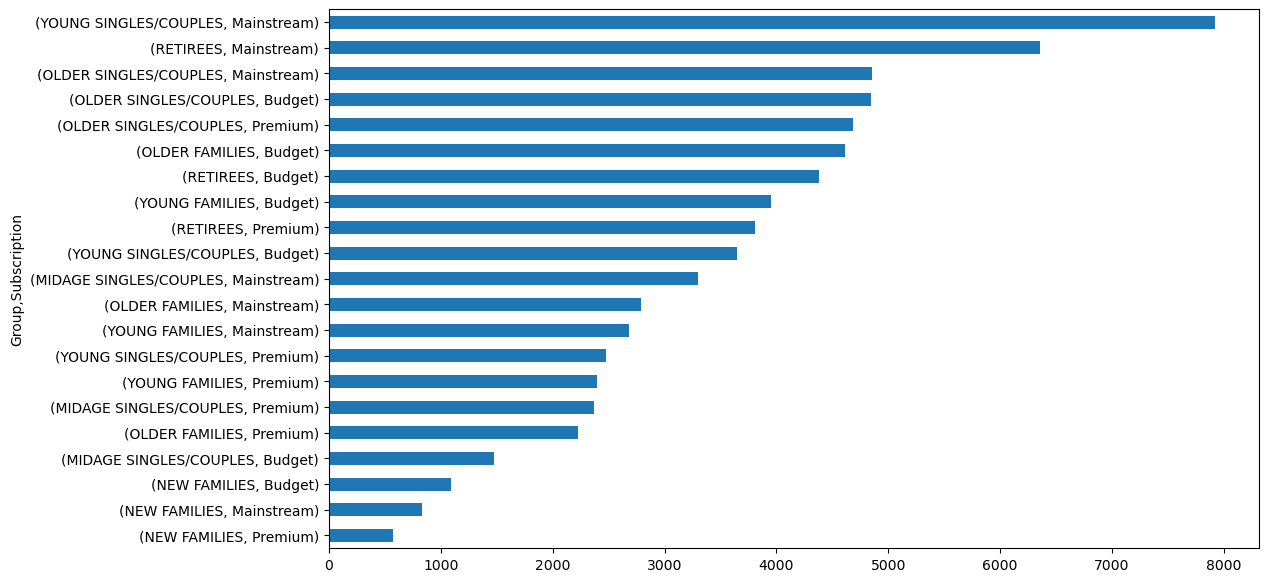

In [88]:
cust_seg.sort_values().plot.barh(figsize = (12, 7))
plt.show()

AVERAGE AMOUNT OF CHIPS BOUGHT PER CUSTOMER SEGMENT

In [93]:
avg_chips = (df.groupby(["Group", "Subscription"])["Quantity"].sum() / df.groupby(["Group", "Subscription"])["Card No."].nunique()).sort_values(ascending=False).to_frame()
avg_chips

0
Group                  Subscription          
OLDER FAMILIES         Mainstream    9.255380
                       Budget        9.076773
                       Premium       9.071717
YOUNG FAMILIES         Budget        8.722995
                       Premium       8.716013
                       Mainstream    8.638361
OLDER SINGLES/COUPLES  Budget        6.781398
                       Premium       6.769543
                       Mainstream    6.712021
MIDAGE SINGLES/COUPLES Mainstream    6.432080
RETIREES               Budget        6.141847
                       Premium       6.103358
MIDAGE SINGLES/COUPLES Premium       6.078514
                       Budget        6.026459
RETIREES               Mainstream    5.925920
NEW FAMILIES           Mainstream    4.891566
                       Budget        4.821527
                       Premium       4.815652
YOUNG SINGLES/COUPLES  Mainstream    4.575597
                       Premium       4.264113
                       Budget        4.250069

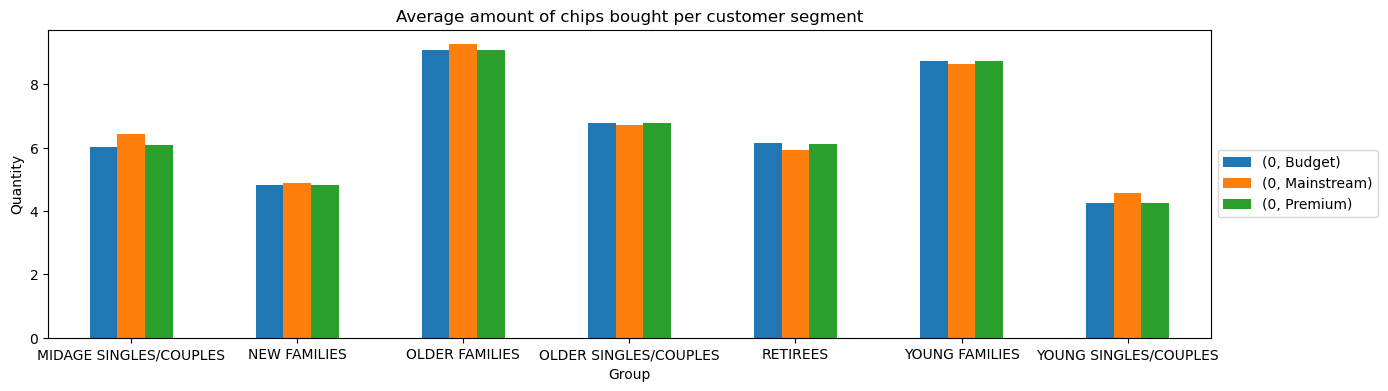

In [95]:
avg_chips.unstack().plot.bar(figsize = (15, 4), rot = 0)
plt.title("Average amount of chips bought per customer segment")
plt.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))
plt.ylabel("Quantity")
plt.show()